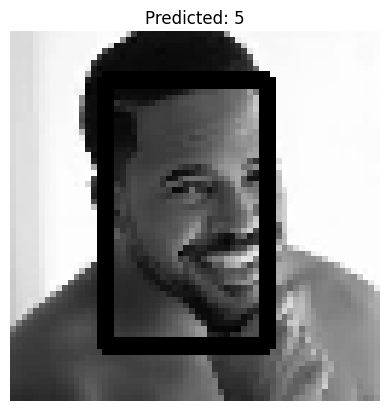

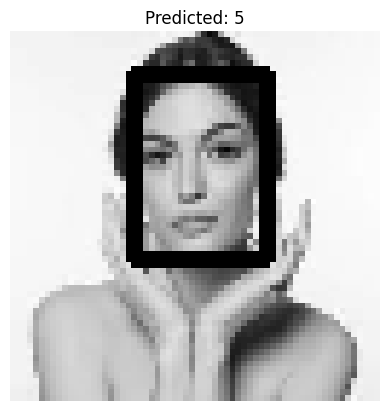

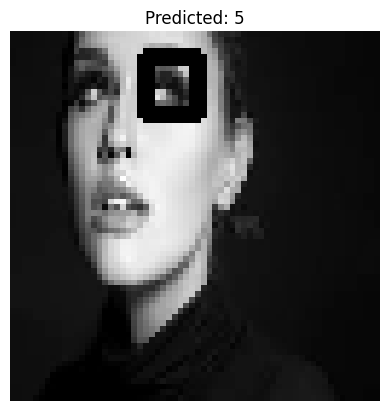

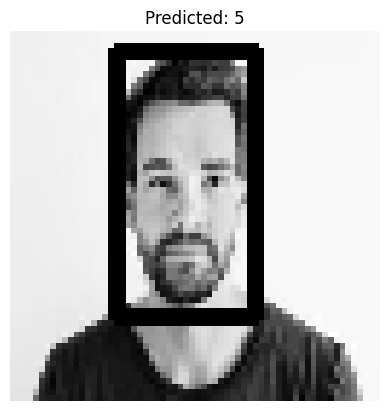

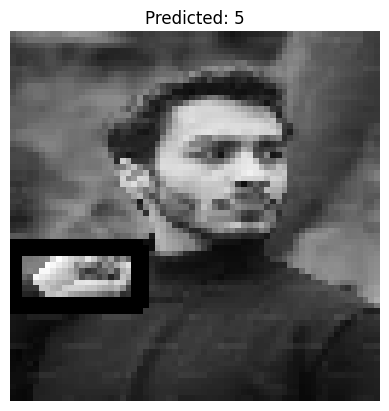

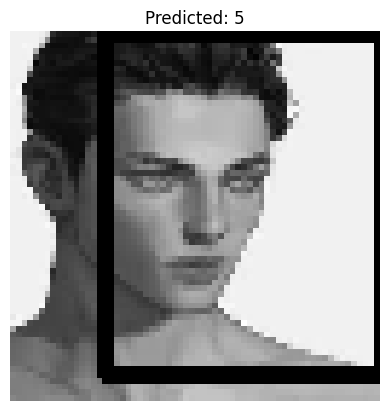

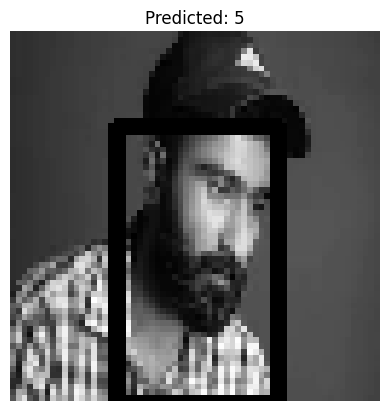

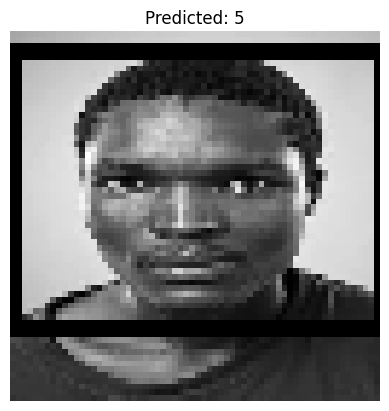

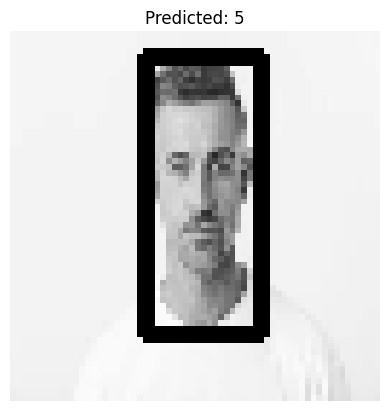

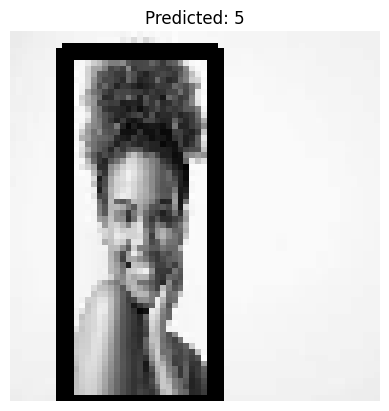

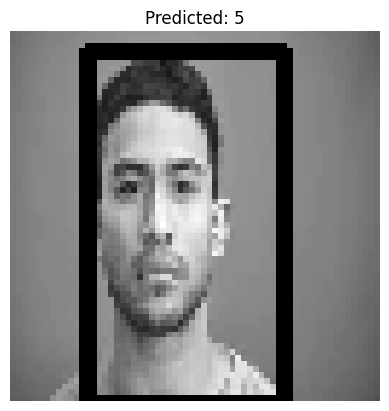

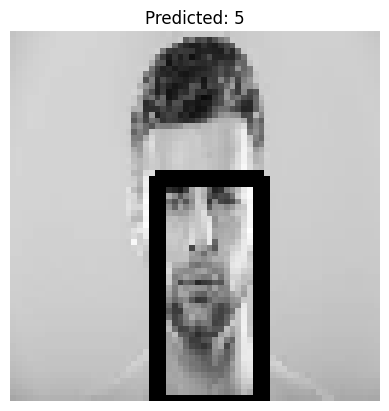

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Load the Olivetti Faces dataset
dt = fetch_olivetti_faces()
x_train, x_test, y_train, y_test = train_test_split(dt.data, dt.target, test_size=0.2, random_state=42)

# Initialize and train the KNeighborsClassifier
model_1 = KNeighborsClassifier(n_neighbors=5)
model_1.fit(x_train, y_train)

# Function to predict face and draw a rectangle around it
def predict_face(image_path):
    # Load and preprocess the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale

    # Check if image loading was successful
    if image is None:
        print(f"Error: Could not load image at {image_path}")
        return

    # Resize the image for visualization (keeping original aspect ratio can be considered)
    original_image = cv2.resize(image, (64, 64))  # Resize to 64x64 for visualization
    # Use GaussianBlur to reduce noise
    blurred_image = cv2.GaussianBlur(original_image, (5, 5), 0)

    # Use Canny edge detection
    edges = cv2.Canny(blurred_image, threshold1=30, threshold2=100)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Assuming the largest contour corresponds to the face
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)

        # Draw the bounding rectangle around the largest contour (the detected face)
        x, y, w, h = cv2.boundingRect(largest_contour)
        # Draw the red rectangle around the detected face
        cv2.rectangle(original_image, (x, y), (x + w, y + h), color=(0, 0, 255), thickness=2)  # Red color in BGR format

        # Extract the region of interest
        roi = original_image[y:y + h, x:x + w]
        roi_resized = cv2.resize(roi, (64, 64))  # Resize to 64x64 for the model
        roi_flattened = roi_resized.flatten().reshape(1, -1)  # Flatten for prediction

        # Predict using the trained model
        predicted_label = model_1.predict(roi_flattened)

        # Display the image with the bounding box and prediction
        plt.imshow(original_image, cmap='gray')
        plt.title(f'Predicted: {predicted_label[0]}')
        plt.axis('off')
        plt.show()
    else:
        print("No contours found in the image.")

# Test with your custom images
for i in range(1, 13):
    image_path = f"img{i}.jfif"  # Adjust the path if your images are in a different directory
    predict_face(image_path)
